# Dataset Preparation

## CASIA-FASD Dataset ([Kaggle](https://www.kaggle.com/datasets/minhnh2107/casiafasd))

In [1]:
!pip install kaggle --q

In [2]:
!kaggle datasets download -d minhnh2107/casiafasd
# https://www.kaggle.com/datasets/minhnh2107/casiafasd

Dataset URL: https://www.kaggle.com/datasets/minhnh2107/casiafasd
License(s): unknown
 74% 52.0M/70.6M [00:00<00:00, 106MB/s]
100% 70.6M/70.6M [00:00<00:00, 114MB/s]


In [4]:
!unzip casiafasd.zip

Streaming output truncated to the last 5000 lines.
  inflating: test_img/test_img/depth/18_HR_4.avi_250_fake.jpg  
  inflating: test_img/test_img/depth/18_HR_4.avi_25_fake.jpg  
  inflating: test_img/test_img/depth/18_HR_4.avi_50_fake.jpg  
  inflating: test_img/test_img/depth/18_HR_4.avi_75_fake.jpg  
  inflating: test_img/test_img/depth/19_1.avi_25_real.jpg  
  inflating: test_img/test_img/depth/19_1.avi_50_real.jpg  
  inflating: test_img/test_img/depth/19_1.avi_75_real.jpg  
  inflating: test_img/test_img/depth/19_2.avi_100_real.jpg  
  inflating: test_img/test_img/depth/19_2.avi_125_real.jpg  
  inflating: test_img/test_img/depth/19_2.avi_150_real.jpg  
  inflating: test_img/test_img/depth/19_2.avi_175_real.jpg  
  inflating: test_img/test_img/depth/19_2.avi_200_real.jpg  
  inflating: test_img/test_img/depth/19_2.avi_25_real.jpg  
  inflating: test_img/test_img/depth/19_2.avi_50_real.jpg  
  inflating: test_img/test_img/depth/19_2.avi_75_real.jpg  
  inflating: test_img/test_img/

## Cropping the faces with MTCNN Model

In [5]:
!pip install mtcnn --q
!pip install pillow --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.8 MB/s eta 0:00:00


In [6]:
from mtcnn import MTCNN
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
def load_image_paths(directory):
    image_paths = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(directory, filename))
    return image_paths

image_paths = load_image_paths('/content/train_img/train_img/color')

In [8]:
image_paths

['/content/train_img/train_img/color/13_3.avi_125_fake.jpg',
 '/content/train_img/train_img/color/19_HR_1.avi_150_real.jpg',
 '/content/train_img/train_img/color/11_1.avi_125_real.jpg',
 '/content/train_img/train_img/color/3_HR_2.avi_25_fake.jpg',
 '/content/train_img/train_img/color/1_HR_1.avi_75_real.jpg',
 '/content/train_img/train_img/color/12_HR_1.avi_100_real.jpg',
 '/content/train_img/train_img/color/7_3.avi_225_fake.jpg',
 '/content/train_img/train_img/color/3_7.avi_100_fake.jpg',
 '/content/train_img/train_img/color/9_HR_1.avi_150_real.jpg',
 '/content/train_img/train_img/color/4_2.avi_50_real.jpg',
 '/content/train_img/train_img/color/8_3.avi_125_fake.jpg',
 '/content/train_img/train_img/color/20_8.avi_75_fake.jpg',
 '/content/train_img/train_img/color/4_HR_4.avi_175_fake.jpg',
 '/content/train_img/train_img/color/5_4.avi_50_fake.jpg',
 '/content/train_img/train_img/color/2_3.avi_125_fake.jpg',
 '/content/train_img/train_img/color/20_4.avi_125_fake.jpg',
 '/content/train_img/

In [13]:
import os
from mtcnn import MTCNN
from PIL import Image
import numpy as np

def detect_and_crop_faces(image_path, detector):
    image = Image.open(image_path)
    image_np = np.asarray(image)
    result = detector.detect_faces(image_np)
    if result:
        for person in result:
            bounding_box = person['box']
            keypoints = person['keypoints']

            # Crop the detected face
            x, y, width, height = bounding_box
            cropped_face = image_np[y:y+height, x:x+width]

            # Convert the cropped face back to an image
            cropped_face_image = Image.fromarray(cropped_face)

            return cropped_face_image
    return None

# Initialize the MTCNN face detector
detector = MTCNN()

# Directory containing the original images
image_paths = load_image_paths('/content/train_img/train_img/color')

# Directory to save cropped face images
output_dir = '/content/cropped_faces/train_img/color'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each image and save the cropped face with the original filename
for image_path in image_paths:
    cropped_face = detect_and_crop_faces(image_path, detector)
    print("Image path is:", image_path)
    if cropped_face:
        # Extract the original filename
        original_filename = os.path.basename(image_path)
        # Save the cropped face image with the original filename
        cropped_face.save(os.path.join(output_dir, original_filename))


1/1 [==============================] - 0s 100ms/step


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step
Image path is: /content/train_img/train_img/color/15_7.avi_25_fake.jpg
1/1 [==============================] - 0s 28ms/step
Image path is: /content/train_img/train_img/color/13_HR_1.avi_150_real.jpg
1/1 [==============================] - 0s 26ms/step
Image path is: /content/train_img/train_img/color/6_2.avi_200_real.jpg
1/1 [==============================] - 0s 25ms/step
Image path is: /content/train_img/train_img/color/3_8.avi_100_fake.jpg
1/1 [==============================] - 0s 27ms/step
Image path is: /content/train_img/train_img/color/12_HR_4.avi_150_fake.jpg
1/1 [==============================] - 0s 26ms/step
Image path is: /content/train_img/train_img/color/2_HR_3.avi_25_fake.jpg
1/1 [==============================] - 0s 27ms/step
Image path is: /content/train_img/train_img/color/15_5.avi_50_fake.jpg
1/1 [==============================] - 0s 27ms/step
Image path is: /content/tr

/content/cropped_faces/train_img/color
/content/cropped_faces/train_img/color/13_3.avi_125_fake.jpg
/content/cropped_faces/train_img/color/19_HR_1.avi_150_real.jpg
/content/cropped_faces/train_img/color/11_1.avi_125_real.jpg
/content/cropped_faces/train_img/color/3_HR_2.avi_25_fake.jpg
/content/cropped_faces/train_img/color/1_HR_1.avi_75_real.jpg
/content/cropped_faces/train_img/color/12_HR_1.avi_100_real.jpg
/content/cropped_faces/train_img/color/7_3.avi_225_fake.jpg
/content/cropped_faces/train_img/color/3_7.avi_100_fake.jpg
/content/cropped_faces/train_img/color/9_HR_1.avi_150_real.jpg
/content/cropped_faces/train_img/color/4_2.avi_50_real.jpg


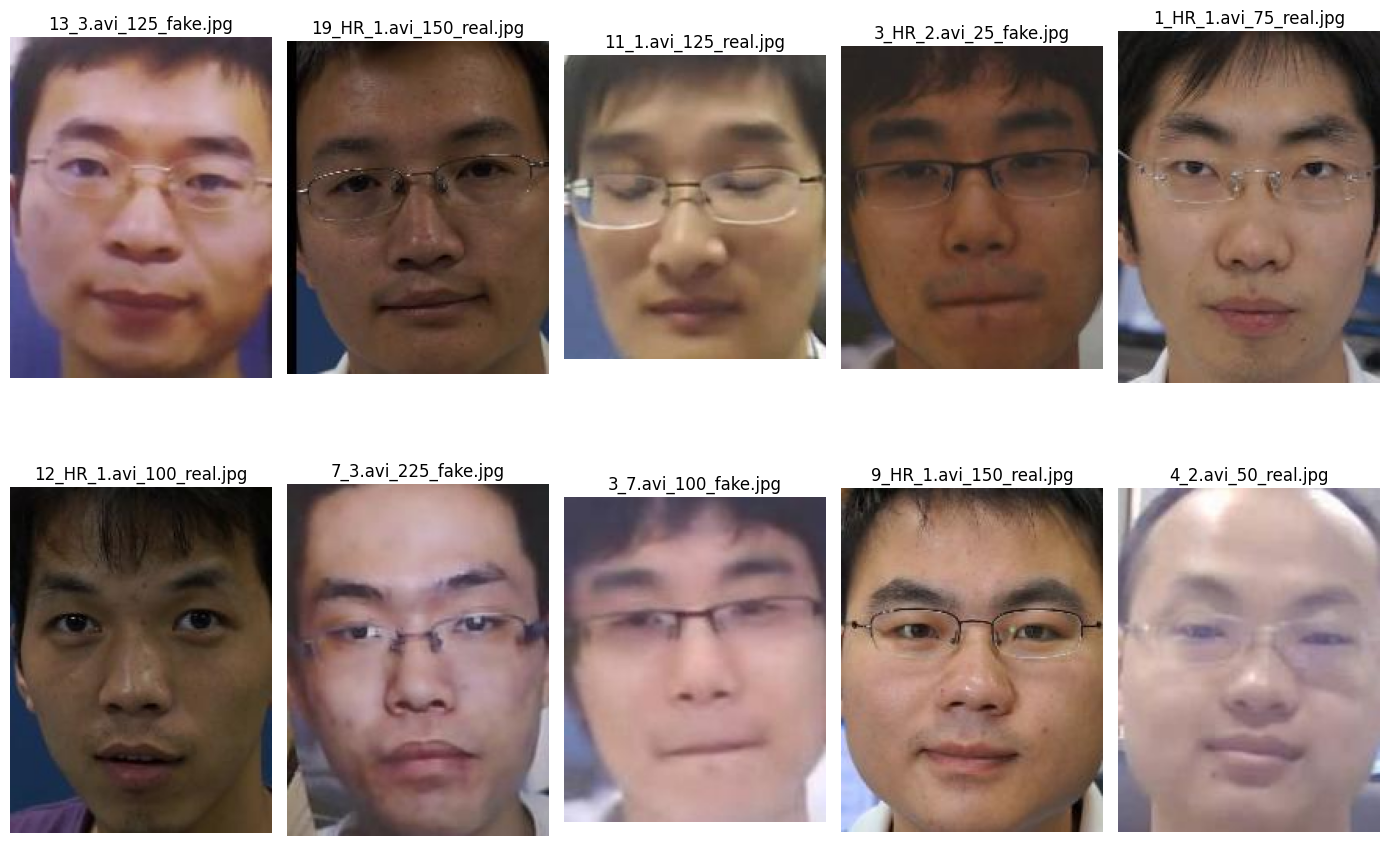

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def show_images(image_paths):
    plt.figure(figsize=(14, 10))  # Adjust figure size as needed
    for i in range(10):
          image_path = image_paths[i]
          print(image_path)
          image = Image.open(image_path)
          plt.subplot(2, 5, i + 1)  # Display in 2x5 grid
          plt.imshow(image)
          plt.axis('off')
          plt.title(os.path.basename(image_path))
    plt.tight_layout()
    plt.show()

# Display 10 images
print(output_dir)
show_images(load_image_paths(output_dir))


In [28]:
labels = []
for path in image_paths:
    # Split the path by '/' and get the last part (filename)
    filename = os.path.basename(path)
    # Split the filename by '_' and get the second last part (label)
    label = filename.split('_')[-1].split('.')[0]  # Assuming label is second last part before '.jpg' or '.png'
    labels.append(label)


In [29]:
labels

['fake',
 'real',
 'real',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'fake',
 'real',
 'fake',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'real',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 

In [39]:
import pandas as pd

# Create a DataFrame with image paths and labels
image_names = []
for image_path in image_paths:
  image_names.append(image_path.split('/')[-1])
df = pd.DataFrame({
    'image': image_names,
    'label': labels
})

# Save the DataFrame to a CSV file
csv_path = '/content/labels.csv'
df.to_csv(csv_path, index=False)

print(f"CSV file saved to {csv_path}")


CSV file saved to /content/labels.csv


In [31]:
!pip install datasets --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


In [32]:
df = pd.read_csv(csv_path)

In [33]:
df

,image_path,label
0,/content/train_img/train_img/color/13_3.avi_12...,fake
1,/content/train_img/train_img/color/19_HR_1.avi...,real
2,/content/train_img/train_img/color/11_1.avi_12...,real
3,/content/train_img/train_img/color/3_HR_2.avi_...,fake
4,/content/train_img/train_img/color/1_HR_1.avi_...,real
...,...,...
1650,/content/train_img/train_img/color/14_3.avi_12...,fake
1651,/content/train_img/train_img/color/12_7.avi_35...,fake
1652,/content/train_img/train_img/color/10_6.avi_15...,fake
1653,/content/train_img/train_img/color/15_1.avi_25...,real


In [35]:
import shutil

# Replace '/content/cropped_faces/train_img/color' with your folder path
folder_to_download = '/content/cropped_faces/train_img/color'
output_filename = '/content/cropped_faces_train_img_color.zip'

# Create a zip file of the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_download)


'/content/cropped_faces_train_img_color.zip'